In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (8,4) # seems like this size gives best size when inserting the figure in latex
#plt.rcParams['figure.figsize'] = (14,10)  # to examine better here
import numpy as np
from scipy.stats import probplot
from scipy.stats import normaltest
from matplotlib import cm

In [2]:
df = pd.read_pickle('C:\\Users\\Nida\\Documents\\NMBU\\master\\microcircuit_spike_data\\microcircuit_77175_df.pkl')

In [3]:
cm = 1/2.54  # centimeters in inches
plt.rcParams['figure.figsize'] = (8*cm,7*cm)
#plt.rcParams['figure.figsize'] = (8*cm,6*cm)

In [4]:
fig_path = 'C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures'

In [5]:
n = 5
colors = plt.cm.viridis(np.linspace(0, 1, n))

# Mean FR and variance as error bars all models

In [6]:
def get_mean_std(model):
    """
    Retrieve the mean of each cv distribution. The mean is calculated for each of the 10 simulations in each case then 
    the mean of these means are taken, and the std of these 10 means are taken. Store in a list which will be returned.
    """
    res = [8,16,32,64,128,256]
    means = []
    stds = []
    for r in res:
        means_m = []
        for i in range(1,11):
            fr = model[r][i].values
            frs = [float(x)*1000 for x in fr]
            me = np.mean(frs)
            means_m.append(me)
        m, s =  np.mean(means_m), np.std(means_m)
        means.append(m)
        stds.append(s)
    return means, stds


In [7]:
def get_mean_std_cont(model):
    means = []
    for i in range(1,11):
        fr = model[i].values
        frs = [float(x)*1000 for x in fr]
        m = np.mean(frs)
        means.append(m)
    return np.mean(means), np.std(means)
        

In [8]:
y1, e1 = get_mean_std(df.loc['droop','FR'])
y2, e2 = get_mean_std(df.loc['equal','FR'])
m_c, s_c = get_mean_std_cont(df.loc['continuous','FR'][8])

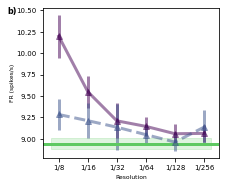

In [10]:
x = [4,8,12,16,20,24]
l=3
plt.errorbar(x, y1, e1, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
plt.errorbar(x, y2, e2, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
plt.axhline(y=m_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,25]
plt.fill_between(x2,y1=m_c-s_c,y2=m_c+s_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('FR (spikes/s)',fontsize=6, labelpad=1)
plt.xticks(x,('1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
textstr = 'b)'
plt.text(-0.035, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_FR_microcircuit.pdf'.format(fig_path),bbox_inches='tight')
# analysis, not include in thesis:
#plt.grid()
plt.show();

# Mean CV and variance as error bars all models

In [11]:
def get_mean_std(model):
    """
    Retrieve the mean of each cv distribution. The mean is calculated for each of the 10 simulations in each case then 
    the mean of these means are taken, and the std of these 10 means are taken. Store in a list which will be returned.
    """
    res = [8,16,32,64,128,256]
    means = []
    stds = []
    for r in res:
        means_m = []
        for i in range(1,11):
            me = model[r][i].mean()
            means_m.append(me)
        m, s =  np.mean(means_m), np.std(means_m)
        means.append(m)
        stds.append(s)
    return means, stds


In [12]:
def get_mean_std_cont(model):
    means = []
    for i in range(1,11):
        m = model[i].mean()
        means.append(m)
    return np.mean(means), np.std(means)
        

In [13]:
means, stds = get_mean_std(df.loc['droop','CV'])
means_e, stds_e = get_mean_std(df.loc['equal','CV'])
mean_c, std_c = get_mean_std_cont(df.loc['continuous','CV'][8])

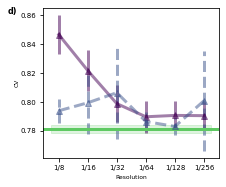

In [14]:
x = [4,8,12,16,20,24]
l=3
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
eq=plt.errorbar(x, means_e, stds_e, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
eq[-1][0].set_linestyle('--') # get dashed errorbar for equal model
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,25]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('CV',fontsize=6, labelpad=1)
plt.xticks(x,('1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
textstr = 'd)'
plt.text(-0.035, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_CV_microcircuit.pdf'.format(fig_path),bbox_inches='tight')
# only for analysis, not to be included in thesis:
#plt.grid()
plt.show();

# Mean CC and variance as errorbars

In [15]:
means, stds = get_mean_std(df.loc['droop','CC_5'])
means_e, stds_e = get_mean_std(df.loc['equal','CC_5'])
mean_c, std_c = get_mean_std_cont(df.loc['continuous','CC_5'][8])

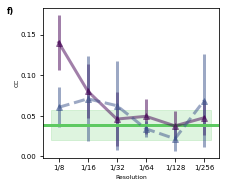

In [16]:
x = [4,8,12,16,20,24]
l=3
plt.errorbar(x, means, stds, linestyle='-', marker='^',label='droop',color=colors[0],alpha=0.5,linewidth=l)
plt.errorbar(x, means_e, stds_e, linestyle='dashed', marker='^',label='equal',color=colors[1],alpha=0.5,linewidth=l)
plt.axhline(y=mean_c,label='continuous',color=colors[3],linewidth=l)
x2 = [3,4,8,12,16,20,24,25]
plt.fill_between(x2,y1=mean_c-std_c,y2=mean_c+std_c,alpha=0.2,color=colors[3])
#plt.legend()
plt.xlabel('Resolution',fontsize=6)
plt.ylabel('CC',fontsize=6, labelpad=1)
plt.xticks(x,('1/8','1/16','1/32','1/64','1/128','1/256'))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
textstr = 'f)'
plt.text(-0.035, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_CC_microcircuit.pdf'.format(fig_path),bbox_inches='tight')
#plt.grid() # not include in thesis
plt.show();

In [16]:
m = 9
col = plt.cm.viridis(np.linspace(0, 1, m)) #colorblind friendly

# Mean FR distribution all models

In [17]:
def get_mean_list(model):
    fr_list = []
    for i in range(1,11):
        frs = model[i].values
        frs = [float(x)*1000 for x in frs]
        fr_list.append(frs)
    mean_list = np.mean(fr_list,axis=0)
    return mean_list

In [18]:
p03=get_mean_list(df.loc['droop','FR'][8])
p04=get_mean_list(df.loc['droop','FR'][16])
p05=get_mean_list(df.loc['droop','FR'][32])
p06=get_mean_list(df.loc['droop','FR'][64])
p07=get_mean_list(df.loc['droop','FR'][128])
p08=get_mean_list(df.loc['droop','FR'][256])
p09=get_mean_list(df.loc['continuous','FR'][8])

q03=get_mean_list(df.loc['equal','FR'][8])
q04=get_mean_list(df.loc['equal','FR'][16])
q05=get_mean_list(df.loc['equal','FR'][32])
q06=get_mean_list(df.loc['equal','FR'][64])
q07=get_mean_list(df.loc['equal','FR'][128])
q08=get_mean_list(df.loc['equal','FR'][256])

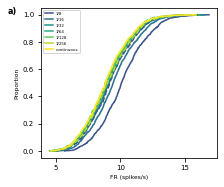

In [19]:
# droop models

plt.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2],label='1/8')
plt.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3],label='1/16')
plt.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4],label='1/32')
plt.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5],label='1/64')
plt.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6],label='1/128')#medium green
plt.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7],label='1/256') #light green
# equal models

plt.plot(np.sort(q03), np.linspace(0, 1, len(q03), endpoint=False),linestyle='dashed',color=col[2])
plt.plot(np.sort(q04), np.linspace(0, 1, len(q04), endpoint=False),linestyle='dashed',color=col[3])
plt.plot(np.sort(q05), np.linspace(0, 1, len(q05), endpoint=False),linestyle='dashed',color=col[4])
plt.plot(np.sort(q06), np.linspace(0, 1, len(q06), endpoint=False),linestyle='dashed',color=col[5])
plt.plot(np.sort(q07), np.linspace(0, 1, len(q07), endpoint=False),linestyle='dashed',color=col[6]) #medium green
plt.plot(np.sort(q08), np.linspace(0, 1, len(q08), endpoint=False),linestyle='dashed',color=col[7]) #light green
# continuous model
plt.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
plt.legend(prop={'size': 4})
plt.xlabel('FR (spikes/s)',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
textstr = 'a)'
plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_FR_microcircuit_ecdf.pdf'.format(fig_path),bbox_inches='tight')
# analysis only, not include in thesis:
#plt.grid()

# Mean CV distribution all models

In [20]:
def get_mean_list(model):
    cv_list = []
    for i in range(1,11):
        cvs = model[i].values
        cv_list.append(cvs)
    mean_list = np.mean(cv_list,axis=0)
    return mean_list

Some neurons do not always fire so we get nan values for cv. But we cannot simply set them to 0 as this is not representable. Drop nan values from the mean list before plotting them.

In [21]:
p03 = get_mean_list(df.loc['droop','CV'][8])
p03 = [x for x in p03 if np.isnan(x) == False]
p04 = get_mean_list(df.loc['droop','CV'][16])
p04 = [x for x in p04 if np.isnan(x) == False]
p05 = get_mean_list(df.loc['droop','CV'][32])
p05 = [x for x in p05 if np.isnan(x) == False]
p06 = get_mean_list(df.loc['droop','CV'][64])
p06 = [x for x in p06 if np.isnan(x) == False]
p07=get_mean_list(df.loc['droop','CV'][128])
p07 = [x for x in p07 if np.isnan(x) == False]
p08=get_mean_list(df.loc['droop','CV'][256])
p08 = [x for x in p08 if np.isnan(x) == False]
p09=get_mean_list(df.loc['continuous','CV'][8])
p09 = [x for x in p09 if np.isnan(x) == False]

q03=get_mean_list(df.loc['equal','CV'][8])
q03 = [x for x in q03 if np.isnan(x) == False]
q04=get_mean_list(df.loc['equal','CV'][16])
q04 = [x for x in q04 if np.isnan(x) == False]
q05=get_mean_list(df.loc['equal','CV'][32])
q05 = [x for x in q05 if np.isnan(x) == False]
q06=get_mean_list(df.loc['equal','CV'][64])
q06 = [x for x in q06 if np.isnan(x) == False]
q07=get_mean_list(df.loc['equal','CV'][128])
q07 = [x for x in q07 if np.isnan(x) == False]
q08=get_mean_list(df.loc['equal','CV'][256])
q08 = [x for x in q08 if np.isnan(x) == False]

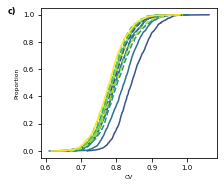

In [22]:
# droop models

plt.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2],label='1/8')
plt.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3],label='1/16')
plt.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4],label='1/32')
plt.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5],label='1/64')
plt.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6],label='1/128')#medium green
plt.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7],label='1/256') #light green
# equal models

plt.plot(np.sort(q03), np.linspace(0, 1, len(q03), endpoint=False),linestyle='dashed',color=col[2])
plt.plot(np.sort(q04), np.linspace(0, 1, len(q04), endpoint=False),linestyle='dashed',color=col[3])
plt.plot(np.sort(q05), np.linspace(0, 1, len(q05), endpoint=False),linestyle='dashed',color=col[4])
plt.plot(np.sort(q06), np.linspace(0, 1, len(q06), endpoint=False),linestyle='dashed',color=col[5])
plt.plot(np.sort(q07), np.linspace(0, 1, len(q07), endpoint=False),linestyle='dashed',color=col[6]) #medium green
plt.plot(np.sort(q08), np.linspace(0, 1, len(q08), endpoint=False),linestyle='dashed',color=col[7]) #light green
# continuous model
plt.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
plt.xlabel('CV',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
#plt.legend()
#analysis only, not include in thesis:
#plt.grid()
textstr = 'c)'
plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_CV_microcircuit_ecdf.pdf'.format(fig_path),bbox_inches='tight')

# Mean CC distribution all models

In [23]:
def get_mean_list(model):
    cc_list = []
    for i in range(1,11):
        ccs = model[i][1:].values
        cc_list.append(ccs)
    mean_list = np.mean(cc_list,axis=0)
    return mean_list

In [24]:
p03=get_mean_list(df.loc['droop','CC_5'][8])
p04=get_mean_list(df.loc['droop','CC_5'][16])
p05=get_mean_list(df.loc['droop','CC_5'][32])
p06=get_mean_list(df.loc['droop','CC_5'][64])
p07=get_mean_list(df.loc['droop','CC_5'][128])
p08=get_mean_list(df.loc['droop','CC_5'][256])
p09=get_mean_list(df.loc['continuous','CC_5'][8])

q03=get_mean_list(df.loc['equal','CC_5'][8])
q04=get_mean_list(df.loc['equal','CC_5'][16])
q05=get_mean_list(df.loc['equal','CC_5'][32])
q06=get_mean_list(df.loc['equal','CC_5'][64])
q07=get_mean_list(df.loc['equal','CC_5'][128])
q08=get_mean_list(df.loc['equal','CC_5'][256])

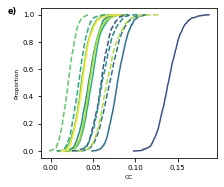

In [25]:
# droop models

plt.plot(np.sort(p03), np.linspace(0, 1, len(p03), endpoint=False),color=col[2],label='1/8')
plt.plot(np.sort(p04), np.linspace(0, 1, len(p04), endpoint=False),color=col[3],label='1/16')
plt.plot(np.sort(p05), np.linspace(0, 1, len(p05), endpoint=False),color=col[4],label='1/32')
plt.plot(np.sort(p06), np.linspace(0, 1, len(p06), endpoint=False),color=col[5],label='1/64')
plt.plot(np.sort(p07), np.linspace(0, 1, len(p07), endpoint=False),color=col[6],label='1/128')#medium green
plt.plot(np.sort(p08), np.linspace(0, 1, len(p08), endpoint=False),color=col[7],label='1/256') #light green
# equal models

plt.plot(np.sort(q03), np.linspace(0, 1, len(q03), endpoint=False),linestyle='dashed',color=col[2])
plt.plot(np.sort(q04), np.linspace(0, 1, len(q04), endpoint=False),linestyle='dashed',color=col[3])
plt.plot(np.sort(q05), np.linspace(0, 1, len(q05), endpoint=False),linestyle='dashed',color=col[4])
plt.plot(np.sort(q06), np.linspace(0, 1, len(q06), endpoint=False),linestyle='dashed',color=col[5])
plt.plot(np.sort(q07), np.linspace(0, 1, len(q07), endpoint=False),linestyle='dashed',color=col[6]) #medium green
plt.plot(np.sort(q08), np.linspace(0, 1, len(q08), endpoint=False),linestyle='dashed',color=col[7]) #light green
# continuous model
plt.plot(np.sort(p09), np.linspace(0, 1, len(p09), endpoint=False),color=col[8],label='continuous') # yellow
#plt.legend()
plt.xlabel('CC',fontsize=6);
plt.ylabel('Proportion',fontsize=6);
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
textstr = 'e)'
plt.text(-0.025, 0.85, textstr, fontsize=8, transform=plt.gcf().transFigure,weight='bold');
plt.savefig(r'{}\mean_CC_microcircuit_ecdf.pdf'.format(fig_path),bbox_inches='tight')
# analysis only, do not include in thesis:
#plt.grid()